<a href="https://colab.research.google.com/github/AkhilaGHub/XAI-in-Oral-Cancer-Prediction/blob/main/Oral_Cancer_Prediction(Actual_Images).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cancer='/content/drive/MyDrive/archive/OralCancer/cancer'
non_cancer='/content/drive/MyDrive/archive/OralCancer/non-cancer'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 106 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 8s/step - accuracy: 0.6951 - loss: 0.9207 - val_accuracy: 0.3200 - val_loss: 0.7339
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5000 - loss: 0.7524

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5000 - loss: 0.7524 - val_accuracy: 0.3200 - val_loss: 0.7287
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5215 - loss: 0.6853 - val_accuracy: 0.6800 - val_loss: 0.5900
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.6562 - loss: 0.6411 - val_accuracy: 0.6800 - val_loss: 0.5879
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6287 - loss: 0.6514 - val_accuracy: 0.6800 - val_loss: 0.5939
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 583ms/step - accuracy: 0.6562 - loss: 0.6141 - val_accuracy: 0.6800 - val_loss: 0.5844
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6341 - loss: 0.6269 - val_accuracy: 0.6800 - val_loss: 0.5953
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step - accuracy: 0.9000 - loss: 0.4781 - val_accuracy: 0.6800 - val_loss: 0.5692
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6224 - loss: 0.6110 - val_accuracy: 0.6800 - val_loss: 0.5913
Epoch 10/10
3/3 ━

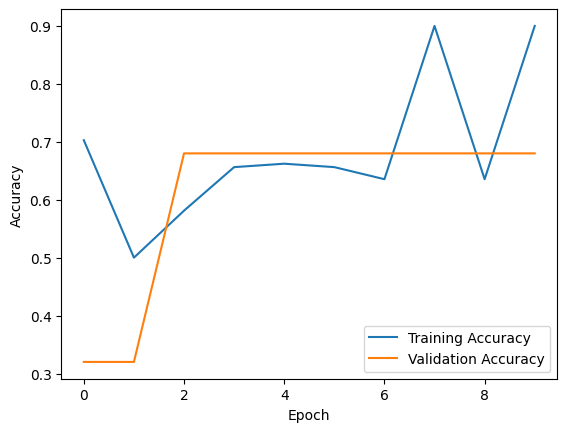

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = (150, 150)  # Size to which images will be resized
BATCH_SIZE = 32
EPOCHS = 10
cancer_path = '/content/drive/MyDrive/archive/OralCancer'

# Data Generators for Loading Data
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  # 80-20 train-validation split

train_generator = train_datagen.flow_from_directory(
    cancer_path,  # Main directory containing cancer and non-cancer folders
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Building the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compiling the Model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Plotting Training Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Saving the Model
model.save('oral_cancer_detection_model.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and recompile the saved model
model = tf.keras.models.load_model('oral_cancer_detection_model.h5')
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    prediction_result = int(predictions[0][0] > 0.5)
    class_names = ['Non-Cancer', 'Cancer']

    print("Prediction:", class_names[prediction_result])

# Example usage:
predict_image('/content/drive/MyDrive/archive/OralCancer/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Prediction: Non-Cancer


In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6800 - loss: 0.5748
Validation Accuracy: 68.00%


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 50
cancer_path = '/content/drive/MyDrive/archive/OralCancer'

In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8400 - loss: 1.3369
Validation Accuracy: 84.00%


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Constants
IMAGE_SIZE = (256, 256)  # Target image size
BATCH_SIZE = 32
EPOCHS = 10
cancer_path = '/content/drive/MyDrive/archive/OralCancer'

# Data Generators for Loading Data
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Building the CNN Model with Flatten adjustment
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),  # Flatten the output from the Conv layers to feed into Dense layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the Model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Evaluate Model Accuracy
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Found 106 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.5298 - loss: 1.6159 - val_accuracy: 0.6800 - val_loss: 0.6710
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 750ms/step - accuracy: 0.4688 - loss: 0.7424 - val_accuracy: 0.6800 - val_loss: 0.6028
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.5951 - loss: 0.6384 - val_accuracy: 0.6800 - val_loss: 0.5942
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 808ms/step - accuracy: 0.7000 - loss: 0.5933 - val_accuracy: 0.6800 - val_loss: 0.5933
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.6631 - loss: 0.6239 - val_accuracy: 0.6800 - val_loss: 0.6169
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6562 - loss: 0.5721 - val_accuracy: 0.6800 - val_loss: 0.6091
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.6631 - loss: 0.5728 - val_accuracy: 0.6800 - val_loss: 0.6138
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7188 - loss: 0.5055 - val_accuracy: 0.7600 - val_loss: 0.6310
Epoch 9/10
3/3 ━━

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    class_names = ['Cancer', 'Non-Cancer']

    print("Prediction:", class_names[int(predictions[0][0] > 0.5)])

# Example usage:
predict_image('/content/drive/MyDrive/archive/OralCancer/non-cancer/20200314_1129242.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediction: Non-Cancer


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to cancer and non-cancer images
cancer_path = '/content/drive/MyDrive/archive/OralCancer'

# Constants
IMAGE_SIZE = (256, 256)  # Target image size
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.0001

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generators for training and validation
train_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load VGG16 with pre-trained ImageNet weights, without the top classification layer
base_model = VGG16(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Building the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Save the model
model.save('oral_cancer_detection_model1.h5')

# Prediction Function to Handle Any Input Image
def predict_image(image_path, model, target_size=(256, 256)):
    """
    Preprocesses the image and makes a prediction using the trained model.
    Args:
        image_path: Path to the image to be predicted.
        model: Trained Keras model.
        target_size: The target size to resize the image (default is (256, 256)).
    Returns:
        Prediction result: 'Cancer' or 'Non-Cancer'.
    """
    image = load_img(image_path)
    image = image.convert('RGB')  # Ensure image is in RGB format
    image = image.resize(target_size)  # Resize to match model input size
    image = img_to_array(image) / 255.0  # Normalize the image
    image = tf.expand_dims(image, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(image)
    return "Cancer" if prediction[0][0] > 0.5 else "Non-Cancer"

# Example usage
model = tf.keras.models.load_model('oral_cancer_detection_model.h5')
image_path = '/content/drive/MyDrive/archive/OralCancer/cancer/Tongue-cancer-symptoms.png'  # Replace with the path to your image
result = predict_image(image_path, model)
print(f"Prediction: {result}")


Found 106 images belonging to 2 classes.
Found 25 images belonging to 2 classes.
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 26s/step - accuracy: 0.5689 - loss: 0.7574 - val_accuracy: 0.7200 - val_loss: 0.5328
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 10s/step - accuracy: 0.7188 - loss: 0.5440 - val_accuracy: 0.7600 - val_loss: 0.4997
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 97s 26s/step - accuracy: 0.6194 - loss: 0.7397 - val_accuracy: 0.8000 - val_loss: 0.4609
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 10s/step - accuracy: 0.7812 - loss: 0.4693 - val_accuracy: 0.7200 - val_loss: 0.6095
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 78s 25s/step - accuracy: 0.6653 - loss: 0.6294 - val_accuracy: 0.8400 - val_loss: 0.3567
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 9s/step - accuracy: 0.5938 - loss: 0.6220 - val_accuracy: 0.8800 - val_loss: 0.3553
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 80s 26s/step - accuracy: 0.8169 - loss: 0.5086 - val_accuracy: 0.8400 - val_loss: 0.4082
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 9s/st

Validation Accuracy: 84.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
Prediction: Non-Cancer


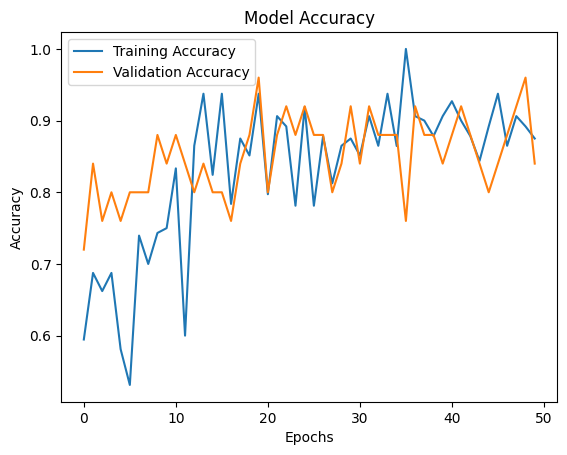

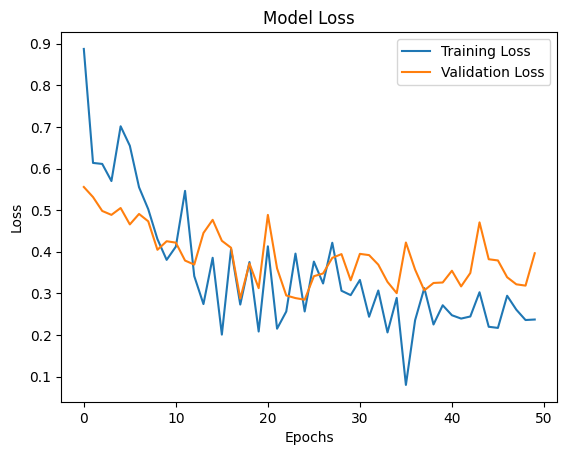

In [ ]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    class_names = ['Cancer', 'Non-Cancer']

    print("Prediction:", class_names[int(predictions[0][0] > 0.5)])

# Example usage:
predict_image('/content/3.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
Prediction: Non-Cancer


In [ ]:
predict_image('/content/2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: Cancer


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=94fd36eafdad0e00700cefc4e67852831b189991b436862f7d1c46ff567d2907
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.models import load_model
model = load_model('/content/oral_cancer_detection_model.h5')  # Replace with your model path


In [ ]:
print("Available labels:", explanation.local_exp.keys())
print("Available images:", explanation.local_exp[0])
print("Available masks:", explanation.local_exp[0][0])

Available labels: dict_keys([0])
Available images: [(14, -0.050056558617574416), (43, -0.03802803718427468), (45, -0.035922267207300365), (15, -0.03507302095292961), (39, -0.02766655956997425), (12, -0.02309380999769026), (20, -0.023025854785646005), (6, -0.019189899883826037), (22, -0.018935464732789918), (23, -0.017627184029291868), (27, -0.01643290506454906), (19, -0.01608235355511523), (29, -0.013685294979892732), (44, 0.01295340803122384), (3, 0.012782175818767044), (25, -0.012684867721629313), (42, 0.012222675238909027), (32, -0.010125849588292527), (41, -0.00994822456729054), (24, -0.009773618290959603), (9, -0.009646079109421257), (7, -0.009256701878044013), (1, 0.008642557090134314), (8, 0.008546396686267506), (21, -0.008024470788236595), (17, -0.007884761773505281), (2, 0.007184604520168082), (26, -0.007019759362980278), (28, -0.0067633105699073355), (4, 0.006134044862405667), (30, -0.006002848508456878), (11, 0.005965699507991438), (18, -0.005766357632147906), (40, -0.005596

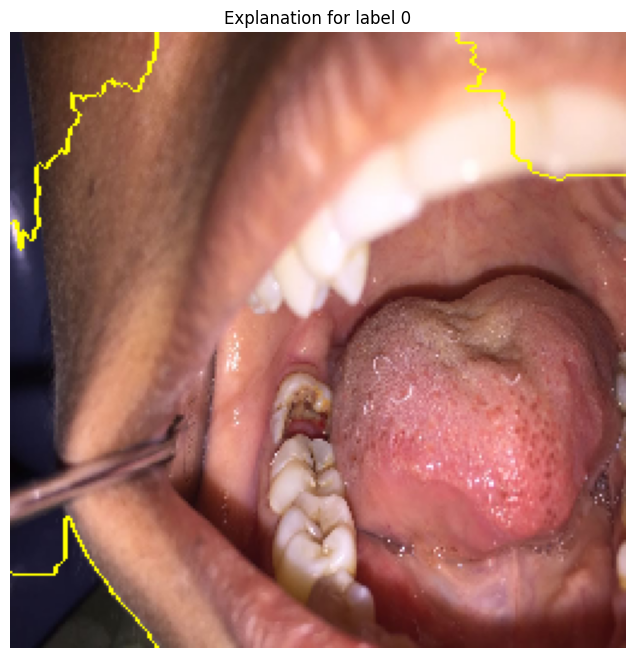

In [ ]:
# Specify the available label (0 in this case)
label_to_explain = 0

# Get the image and mask for the label
temp, mask = explanation.get_image_and_mask(
    label_to_explain,   # Use the available label
    positive_only=True, # Highlight only positive contributions
    num_features=5,     # Number of features to display
    hide_rest=False     # Show the full image
)

# Display the explanation
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp, mask))
plt.title(f"Explanation for label {label_to_explain}")
plt.axis('off')
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━

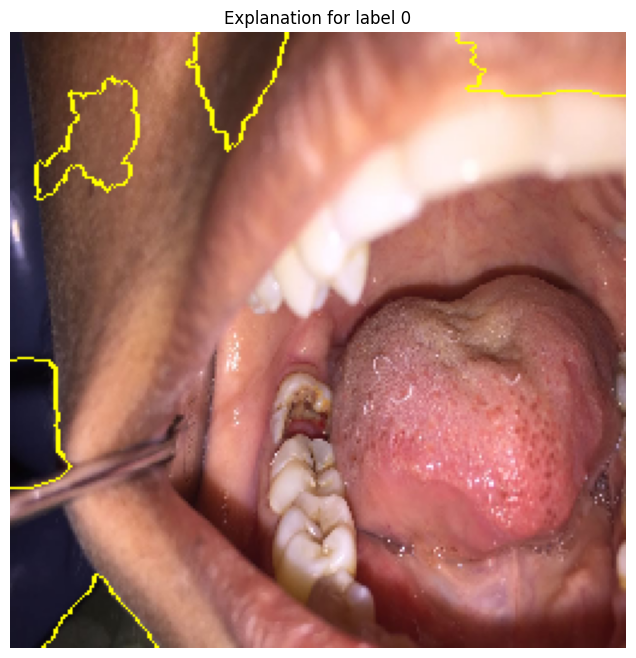

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model  # Load your pre-trained model

# Load your pre-trained model (replace 'path_to_model' with your actual model file)
model = load_model('/content/oral_cancer_detection_model.h5')

# Prediction function for the model
def predict_fn(images):
    # Ensure images are properly reshaped and normalized
    images = np.array(images)
    return model.predict(images)

# Load the image to explain
img_path = '/content/drive/MyDrive/archive/OralCancer/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg'
img = load_img(img_path, target_size=(256, 256))  # Resize to match the model's input size
img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]

# LIME explainer
explainer = lime_image.LimeImageExplainer()

# Explain the image instance
explanation = explainer.explain_instance(
    img_array,               # The image to explain
    predict_fn,              # Your model's prediction function
    top_labels=2,            # Number of top labels to explain
    hide_color=0,            # Color to hide superpixels
    num_samples=1000         # Number of samples for perturbations
)

# Print available labels in the explanation
print("Available labels:", explanation.local_exp.keys())

# Select the label to explain (use a label available in explanation.local_exp)
label_to_explain = list(explanation.local_exp.keys())[0]  # Automatically choose the first available label

# Get image and mask for the selected label
temp, mask = explanation.get_image_and_mask(
    label_to_explain,       # Class to explain
    positive_only=True,     # Highlight positive contributions
    num_features=5,         # Number of superpixels to show
    hide_rest=False         # Whether to hide non-important regions
)

# Plot the result
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp, mask))
plt.title(f"Explanation for label {label_to_explain}")
plt.axis('off')
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━

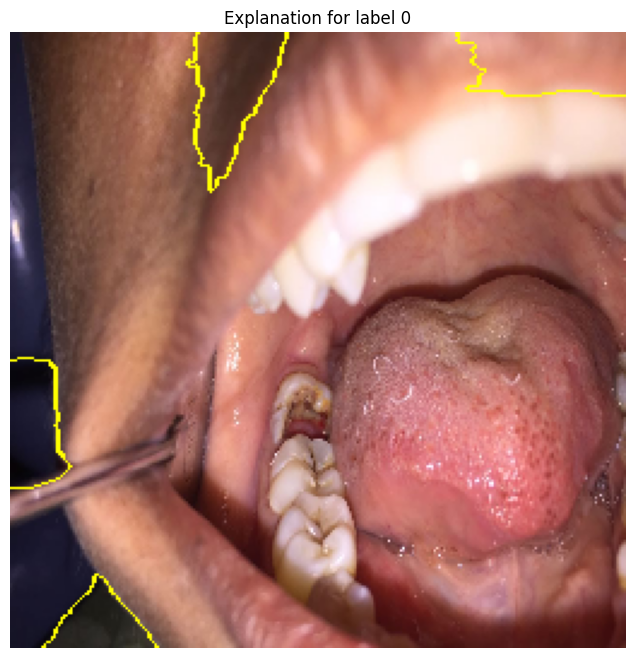

The model identified the following regions as significant:
  1. Superpixel 3 with importance 0.0160.
  2. Superpixel 44 with importance 0.0159.
  3. Superpixel 28 with importance 0.0102.
  4. Superpixel 2 with importance 0.0086.
  5. Superpixel 10 with importance 0.0080.

These regions are likely indicative of patterns (e.g., discoloration, abnormal texture) associated with cancer.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from lime import lime_image

# Define your model's predict function
def predict_fn(images):
    images = np.array(images)
    return model.predict(images)

# Load and preprocess the image
img_path = '/content/drive/MyDrive/archive/OralCancer/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg'
img = load_img(img_path, target_size=(256, 256))  # Resize to match model's input size
img_array = img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(
    img_array[0],                        # The image to explain
    predict_fn,                          # Your model's prediction function
    top_labels=2,                        # Number of top labels to explain
    hide_color=0,                        # Color to hide superpixels
    num_samples=1000                     # Number of perturbations
)

# Print the top labels identified by LIME
print("Top labels identified by LIME:", explanation.top_labels)

# Use the first label from the top labels (ensure this is valid)
label_to_explain = explanation.top_labels[0]  # Select the most probable label

# Get the image and mask for visualization
temp, mask = explanation.get_image_and_mask(
    label_to_explain,                    # Class to explain
    positive_only=True,                  # Highlight positive contributions
    num_features=5,                      # Number of superpixels to show
    hide_rest=False                      # Whether to hide non-important regions
)

# Plot the explanation
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp, mask))
plt.title(f"Explanation for label {label_to_explain}")
plt.axis('off')
plt.show()

# Function to generate textual explanation
def generate_textual_explanation(explanation, label_to_explain):
    # Get the weights of the superpixels for the specified label
    if label_to_explain not in explanation.local_exp:
        raise ValueError(f"Label {label_to_explain} not found in explanation")

    superpixel_contributions = explanation.local_exp[label_to_explain]

    # Sort superpixels by their contribution weights (importance)
    superpixel_contributions = sorted(superpixel_contributions, key=lambda x: x[1], reverse=True)

    # Generate explanation based on superpixel importance
    explanation_text = "The model identified the following regions as significant:\n"
    for idx, (superpixel, weight) in enumerate(superpixel_contributions[:5]):  # Top 5 superpixels
        explanation_text += f"  {idx + 1}. Superpixel {superpixel} with importance {weight:.4f}.\n"

    explanation_text += "\nThese regions are likely indicative of patterns (e.g., discoloration, abnormal texture) associated with cancer."
    return explanation_text

# Generate and print the textual explanation
textual_explanation = generate_textual_explanation(explanation, label_to_explain)
print(textual_explanation)
